In [337]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [338]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    @property
    def x(self):
        return self._x

    @x.setter
    def x(self, value):
        self._x = value
        
    @property
    def y(self):
        return self._y

    @y.setter
    def y(self, value):
        self._y = value
        
    def __str__(self):
        return f" X: {self.x}, Y: {self.y}"

In [339]:
def read_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    points = list()
    for child in root:
        p1 = Point(int(child.findall("./Item1/X")[0].text), int(child.findall("./Item1/Y")[0].text))
        p2 = Point(int(child.findall("./Item2/X")[0].text), int(child.findall("./Item2/Y")[0].text))
        points.append((p1, p2))
    return points


In [340]:
points1 = read_xml("/Users/sophiyca/RiderProjects/Observer/Observer/observer1.xml")
points2 = read_xml("/Users/sophiyca/RiderProjects/Observer/Observer/observer2.xml")

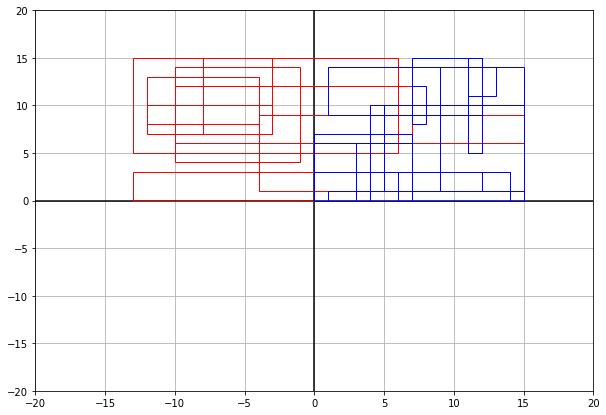

In [341]:
a, b = -20, 20
fig, ax = plt.subplots(figsize=(10, 7))

for rect in points1:
    rect = Rectangle((rect[0].x, rect[0].y), rect[1].x - rect[0].x, rect[1].y - rect[0].y, 
    linewidth=1, 
    edgecolor='r', 
    facecolor='none', 
    zorder=3)
    plt.gca().add_patch(rect)
for rect in points2:
    rect = Rectangle((rect[0].x, rect[0].y), rect[1].x - rect[0].x, rect[1].y - rect[0].y, 
    linewidth=1, 
    edgecolor='b', 
    facecolor='none', 
    zorder=3)
    plt.gca().add_patch(rect)

plt.xlim([a, b])
plt.ylim([a, b])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.grid(zorder=0)
plt.show()
